# In this notebook I produce test cases for different lineshape to be used as tests in the C++ implementation

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import AdvancedBraggEdgeFitting_v2
from scipy.stats import norm
from lmfit import Model
import lmfit

from TOF_routines import tof2l, l2tof, find_first, find_last, find_nearest


## Load the test data, this is the main Bragg edge of the iron powder sample used for calibration of the IMAT experiment 

Text(0, 0.5, 'Transmission [I/$I_{0}$]')

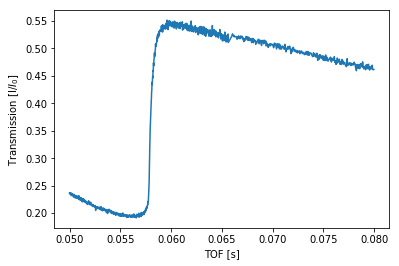

In [3]:
x = np.loadtxt('../test_data/x.txt') # x axis, here in TOF
y = np.loadtxt('../test_data/y.txt') # y axis, here in transmission

plt.figure()
plt.plot(x,y)
plt.xlabel('TOF [s]')
plt.ylabel('Transmission [I/$I_{0}$]')

## First produced case in the transmission and exponential function (default) 
To be tested are:
1. initial edge shape computed with the initial parameters
2. fitted parameters

[[Model]]
    Model(BraggEdgeExponential)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 194
    # data points      = 1107
    # variables        = 7
    chi-square         = 0.02510464
    reduced chi-square = 2.2822e-05
    Akaike info crit   = -11824.3815
    Bayesian info crit = -11789.3156
[[Variables]]
    t0:                 0.05773708 +/- 3.7714e-06 (0.01%) (init = 0.056568)
    alpha:              3.6402e-04 +/- 4.8113e-06 (1.32%) (init = 0.0015)
    sigma:              6.1353e-05 +/- 4.6249e-06 (7.54%) (init = 0.0001)
    a1:                 0.12457211 +/- 0.00411179 (3.30%) (init = 0.315462)
    a2:                 8.01859477 +/- 0.06075438 (0.76%) (init = 5.344784)
    a5:                 0.08703528 +/- 0.02926900 (33.63%) (init = -0.4700811)
    a6:                 17.2455669 +/- 0.54396234 (3.15%) (init = 26.92983)
    bool_transmission: -inf (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a5, a6)       = -0.999
    C(a1,

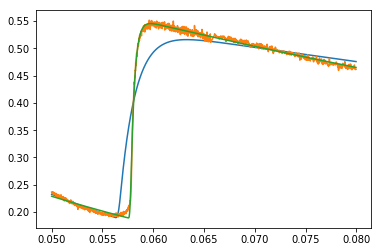

In [4]:

# initial parameters (these are taken from the initial steps in AdvancedBraggEdgeFitting)
t0=0.056568
alpha=0.0015
sigma=0.0001
a1=0.315462
a2=5.3447841
a5=-0.4700811
a6=26.92982514130

mymodel_ini=AdvancedBraggEdgeFitting_v2.BraggEdgeExponential(x,t0,alpha,sigma,a1,a2,a5,a6,True)
myedge = AdvancedBraggEdgeFitting_v2.B(x,t0,alpha,sigma,True)

term3 = AdvancedBraggEdgeFitting_v2.term3(x,t0,sigma)
term4 = AdvancedBraggEdgeFitting_v2.term4(x,t0,alpha,sigma)
term5 = AdvancedBraggEdgeFitting_v2.term5(x,t0,alpha,sigma)

gmodel = Model(AdvancedBraggEdgeFitting_v2.BraggEdgeExponential)

# This by passes the implementation of BraggEdgeFitting which is iterative and makes some steps
params = gmodel.make_params(t0=t0,sigma=sigma, alpha=alpha, a1=a1, a2=a2, a5=a5, a6=a6)
params['bool_transmission'].vary = False


result = gmodel.fit(y, params, t=x, nan_policy='propagate')
print(result.fit_report())
# print(result.best_fit)

plt.figure()
plt.plot(x,mymodel_ini) # Initial model
plt.plot(x,y) # Data
plt.plot(x, result.best_fit) # Best fit
# plt.plot(x, term3)
# plt.plot(x, term4)
# plt.plot(x, term5)

np.savetxt('x.txt',x)
np.savetxt('y.txt',y)
## This possibly I don't need
# np.savetxt('edge.txt', myedge) # This is just the edge shape, without the stuff before and after
# np.savetxt('term3.txt', term3)
# np.savetxt('term4.txt', term4)
# np.savetxt('term5.txt', term5)
np.savetxt('initialmodel.txt', mymodel_ini)

## Here I produced the data that were used for testing the numerical gradient implementation 

(1107,)
[0.0500144 0.0520624 0.0541104 0.0561584 0.0582064 0.0602544 0.0623024
 0.0643504 0.067481  0.071577  0.075673  0.079769 ]
[0.23534522 0.2165284  0.20018048 0.19575375 0.44637236 0.54658031
 0.53501299 0.52704846 0.51911651 0.50342527 0.47944108 0.46291479]
[-9.18790051 -8.58514011 -5.07193518 60.10544023 85.65101687 21.64077781
 -4.76851866 -3.3529659  -3.09563088 -4.84319281 -4.94512709 -4.03473748]


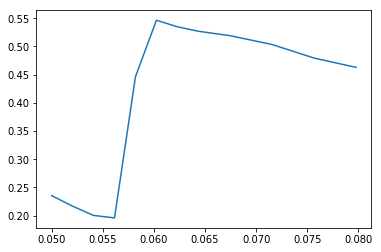

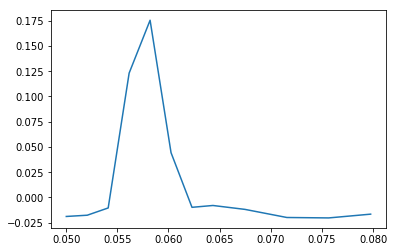

In [12]:

print(np.shape(x))
print(x[1::100])
print(y[1::100])
print(np.gradient(y[1::100], x[1::100]))

plt.figure()
plt.plot(x[1::100], y[1::100])

plt.figure()
plt.plot(x[1::100], np.gradient(y[1::100]))

## Here I test some method for edge height computation 

0.0577370754604216
0.0577370754604216 6.135340628875553e-05 0.00036401946635420204


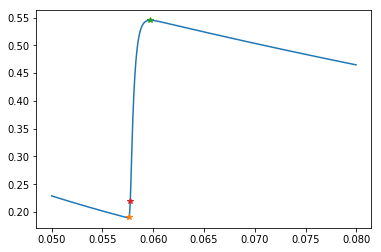

In [15]:
plt.figure()
plt.plot(x, result.best_fit)
print(result.best_values.get('t0'))
edge_point = result.best_values.get('t0')
first_point = result.best_values.get('t0')-1.96*result.best_values.get('sigma')
second_point = result.best_values.get('t0')+1.96*result.best_values.get('sigma')+5*result.best_values.get('alpha')
plt.plot(first_point, result.best_fit[find_nearest(x,first_point)],'*')
plt.plot(second_point, result.best_fit[find_nearest(x,second_point)],'*')
plt.plot(edge_point, result.best_fit[find_nearest(x,edge_point)],'*')



print(result.best_values.get('t0'), result.best_values.get('sigma'), result.best_values.get('alpha'))

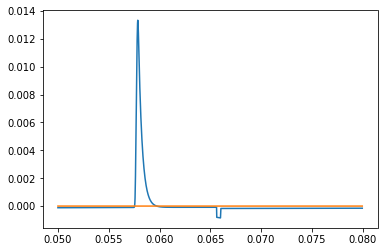

In [17]:
plt.figure()
plt.plot(x, np.gradient(result.best_fit))
plt.plot(x, np.zeros(np.size(result.best_fit)))
plt.plot(x[np.gradient(result.best_fit)==0], (np.gradient(result.best_fit)[np.gradient(result.best_fit)==0]))